# Task4: Multiple Linear regression model to predict the price of a House Based on features like area, furnishing status, bathrooms, bedrooms, stories etc 

**Author: Anant Gupta**

Programme: BCA

# Step 0: Importing libraries and dataset 

In [215]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [216]:
housingDF=pd.read_csv("housing.csv")

In [217]:
housingDF

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Step 1: Cleaning the dataset

checking duplicates

In [218]:
housingDF.drop_duplicates(keep="first",inplace=True)

In [219]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


checking outliers

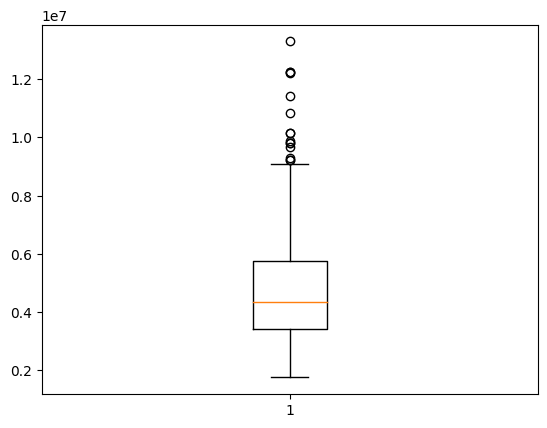

In [220]:
plt.boxplot(housingDF.price)
plt.show()

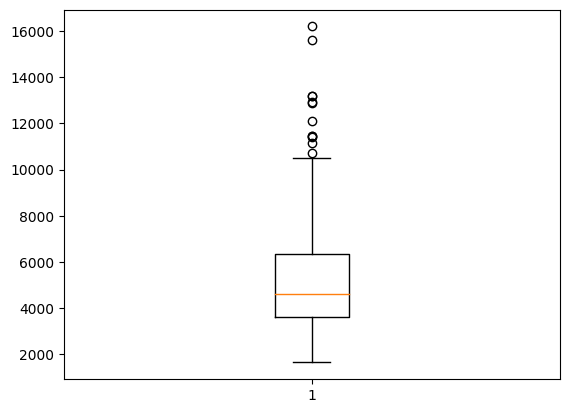

In [221]:
plt.boxplot(housingDF.area)
plt.show()

Dealing with outliers

In [222]:
def outlier_free(data):
    Q1=data.quantile(.25)
    Q3=data.quantile(.75)
    IQR=Q3-Q1
    upwhisk=Q3+(IQR*1.5)
    lowhisk=Q1-(IQR*1.5)
    for i in range(len(housingDF)):
        if data[i]>upwhisk:
            data[i]=upwhisk
        elif data[i]<lowhisk:
            data[i]=lowhisk

In [223]:
outlier_free(housingDF.area)

C:\Users\dell\AppData\Local\Temp\ipykernel_1452\2566083513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=upwhisk


In [224]:
outlier_free(housingDF.price)

C:\Users\dell\AppData\Local\Temp\ipykernel_1452\2566083513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=upwhisk


# Step2: Visualizing the data set 

In [225]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 75.8+ KB


rechecking the boxplot after replacing outliers

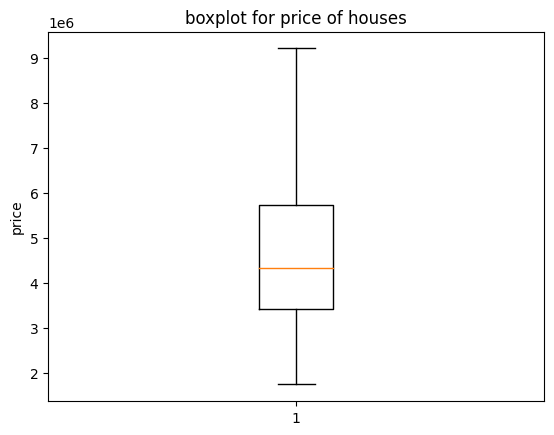

In [226]:
plt.boxplot(housingDF.price)
plt.ylabel("price")
plt.title("boxplot for price of houses")
plt.show()

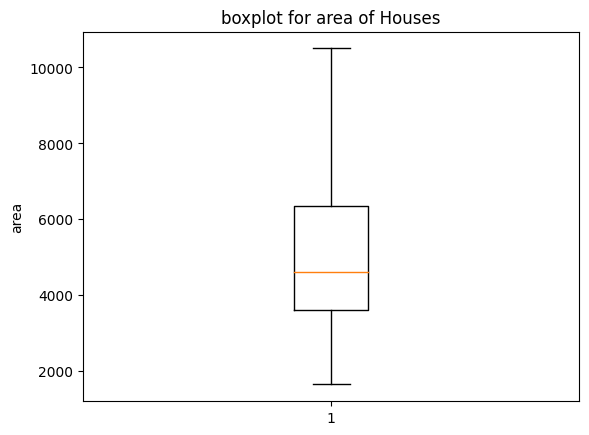

In [227]:
plt.boxplot(housingDF.area)
plt.ylabel("area")
plt.title("boxplot for area of Houses")
plt.show()

Comparing to check for effect of different values of various columns on the value of price

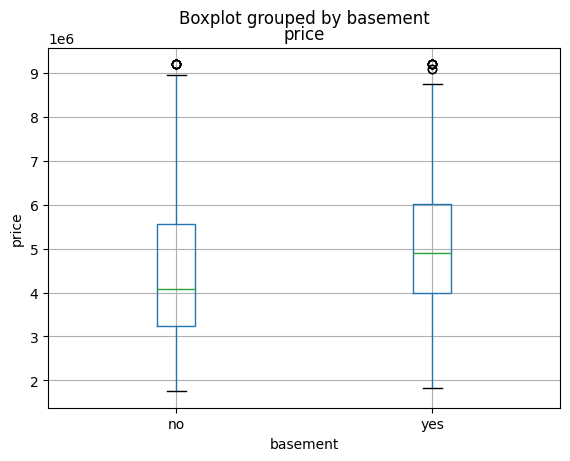

In [228]:
housingDF.boxplot(column="price",by="basement")
plt.xlabel("basement")
plt.ylabel("price")
plt.show()

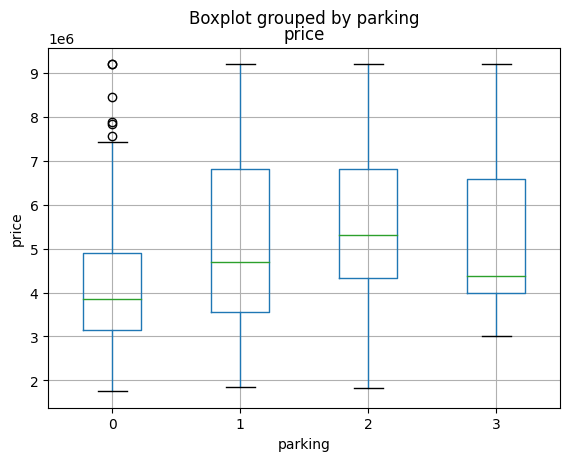

In [229]:
housingDF.boxplot(column="price",by="parking")
plt.xlabel("parking")
plt.ylabel("price")
plt.show()

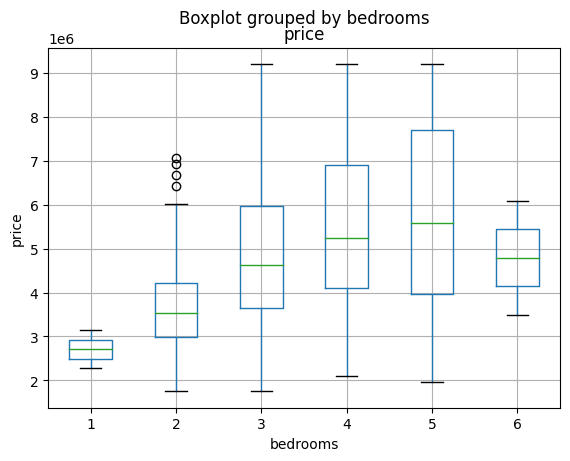

In [230]:
housingDF.boxplot(column="price",by="bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

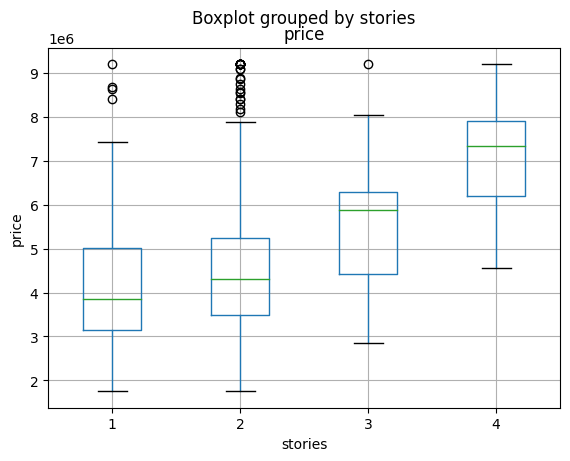

In [231]:
housingDF.boxplot(column="price",by="stories")
plt.xlabel("stories")
plt.ylabel("price")
plt.show()

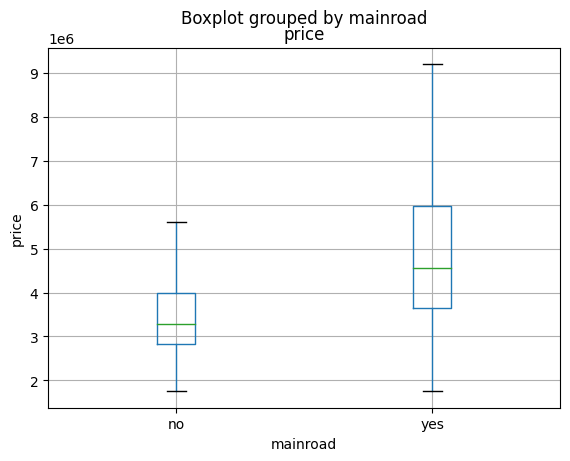

In [232]:
housingDF.boxplot(column="price",by="mainroad")
plt.xlabel("mainroad")
plt.ylabel("price")
plt.show()

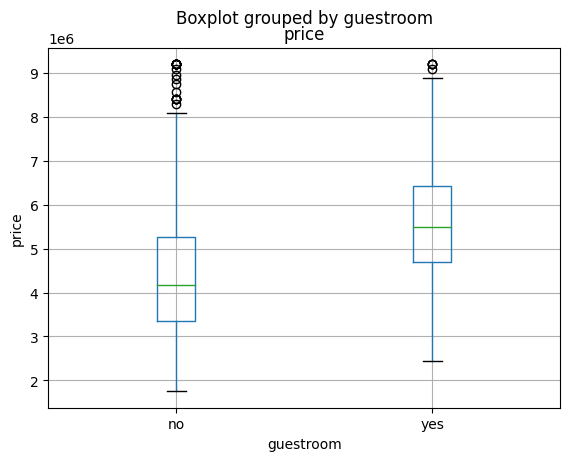

In [233]:
housingDF.boxplot(column="price",by="guestroom")
plt.xlabel("guestroom")
plt.ylabel("price")
plt.show()

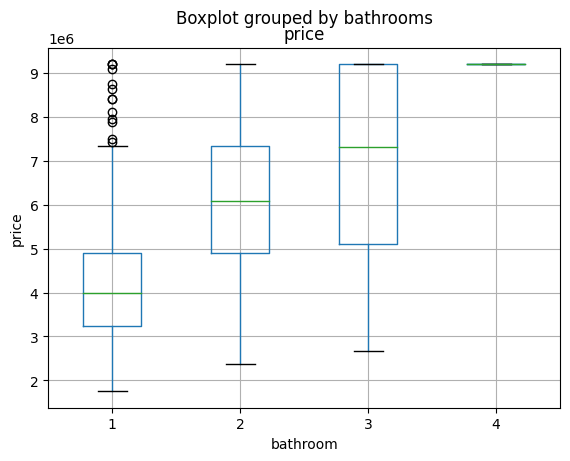

In [173]:
housingDF.boxplot(column="price",by="bathrooms")
plt.ylabel("price")
plt.xlabel("bathroom")
plt.show()

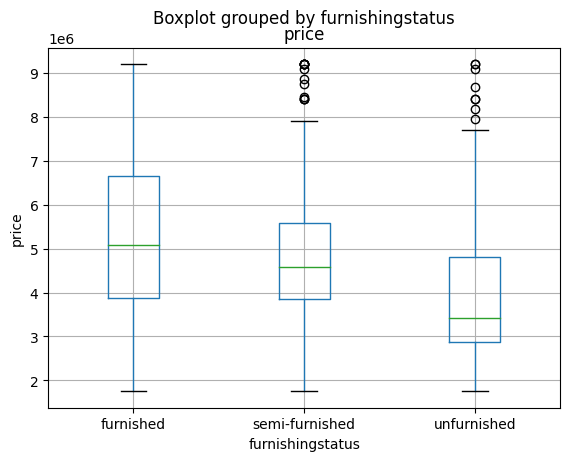

In [174]:
housingDF.boxplot(column="price",by="furnishingstatus")
plt.xlabel("furnishingstatus")
plt.ylabel("price")
plt.show()

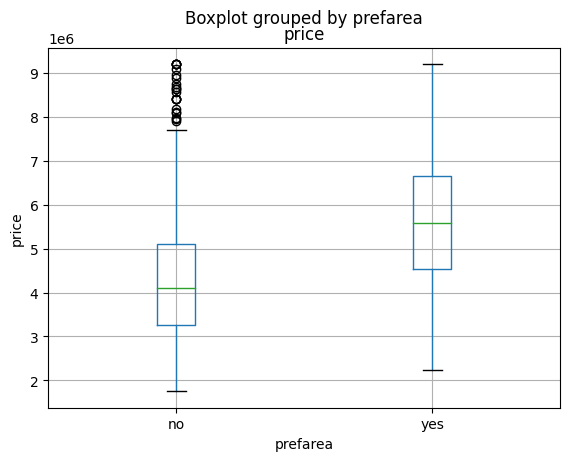

In [175]:
housingDF.boxplot(column="price",by="prefarea")
plt.xlabel("prefarea")
plt.ylabel("price")
plt.show()

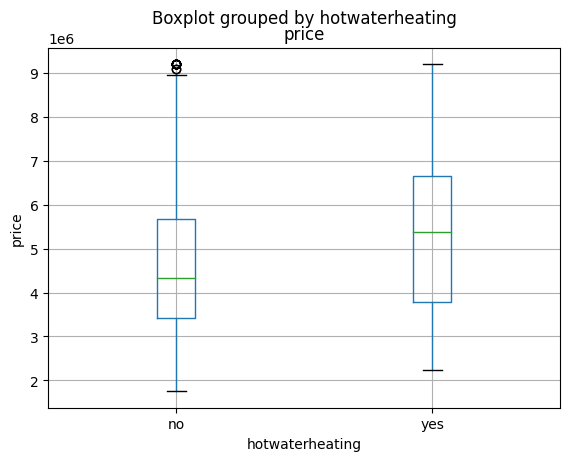

In [176]:
housingDF.boxplot(column="price",by="hotwaterheating")
plt.xlabel("hotwaterheating")
plt.ylabel("price")
plt.show()

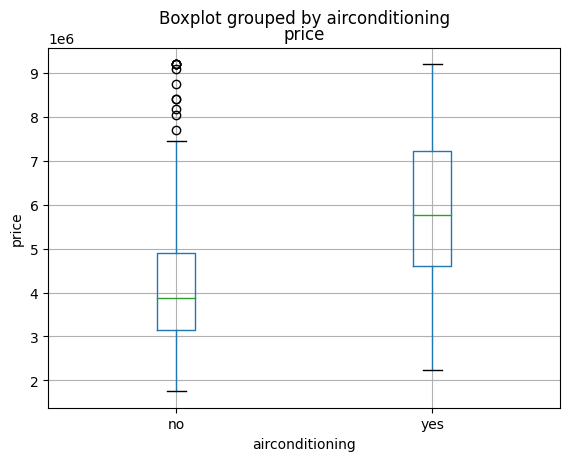

In [177]:
housingDF.boxplot(column="price",by="airconditioning")
plt.xlabel("airconditioning")
plt.ylabel("price")
plt.show()

One-hot encodding to create dummies of categorical columns

In [178]:
housingDF=pd.get_dummies(housingDF,drop_first=True)

In [179]:
housingDF

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,9205000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9205000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,9205000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,9205000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


# Step3: Creating Multiple Linear regression plot

seperating input(independent) features and the target(dependent) feature

In [180]:
x1=housingDF.drop(columns="price")

In [181]:
y1=housingDF["price"]

spliting training data:test data -> 70:30

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(381, 13) (164, 13) (381,) (164,)


fitting regression model

In [183]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

# Step4: Visualising regression plots

<Axes: xlabel='area', ylabel='price'>

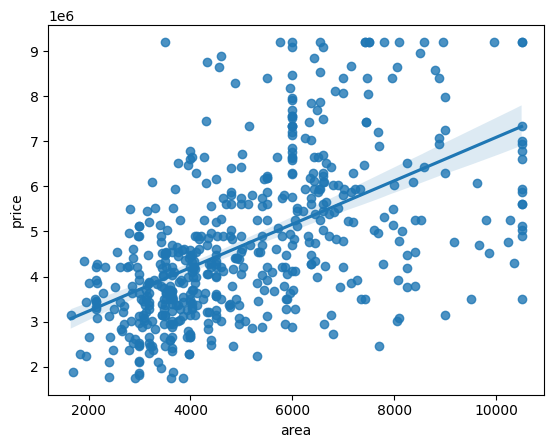

In [184]:
sns.regplot(x="area",y="price",data=housingDF)

<Axes: xlabel='bedrooms', ylabel='price'>

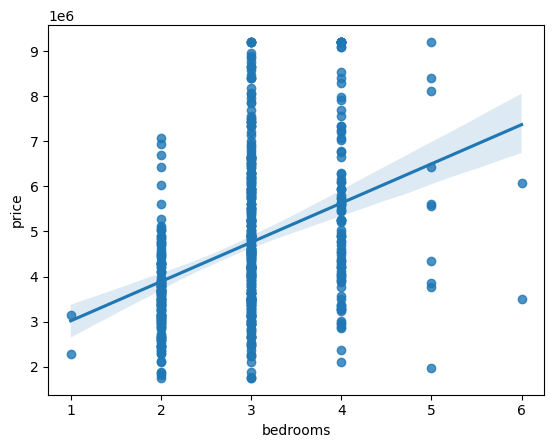

In [185]:
sns.regplot(x="bedrooms",y="price",data=housingDF)

<Axes: xlabel='bathrooms', ylabel='price'>

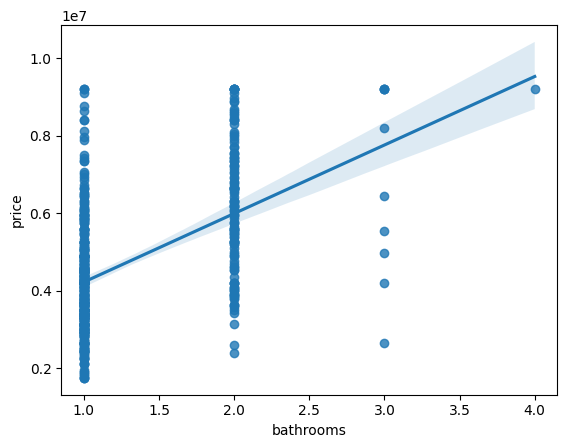

In [186]:
sns.regplot(x="bathrooms",y="price",data=housingDF)  

<Axes: xlabel='stories', ylabel='price'>

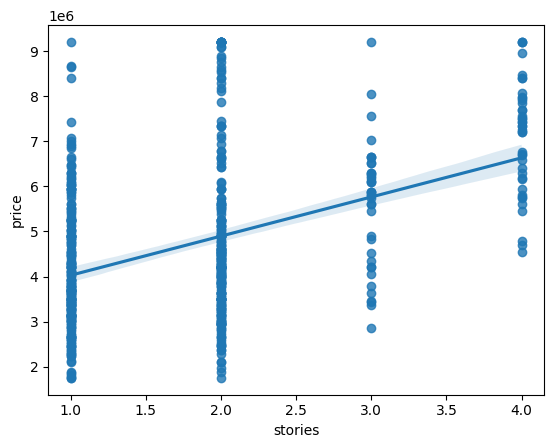

In [187]:
sns.regplot(x="stories",y="price",data=housingDF)  

<Axes: xlabel='parking', ylabel='price'>

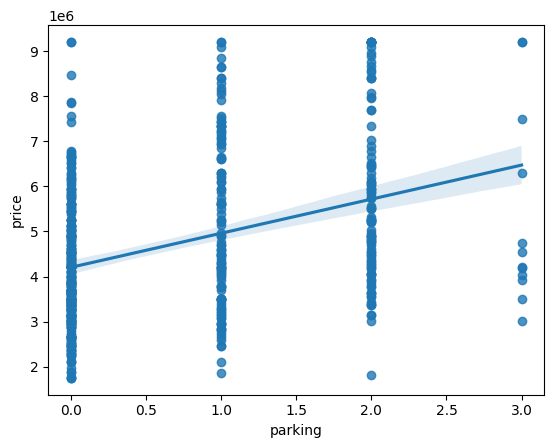

In [188]:
sns.regplot(x="parking",y="price",data=housingDF)  

<Axes: xlabel='mainroad_yes', ylabel='price'>

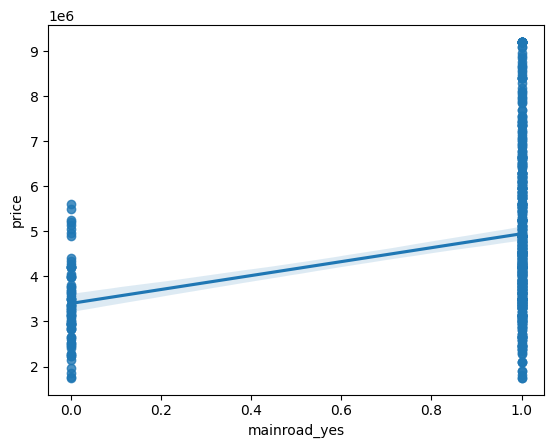

In [189]:
sns.regplot(x="mainroad_yes",y="price",data=housingDF)  

<Axes: xlabel='furnishingstatus_semi-furnished', ylabel='price'>

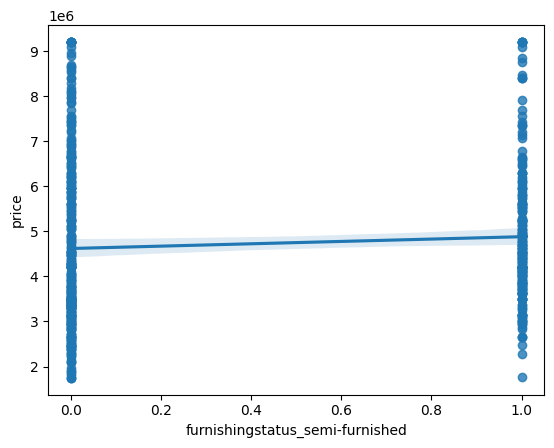

In [190]:
sns.regplot(x="furnishingstatus_semi-furnished",y="price",data=housingDF)  

<Axes: xlabel='prefarea_yes', ylabel='price'>

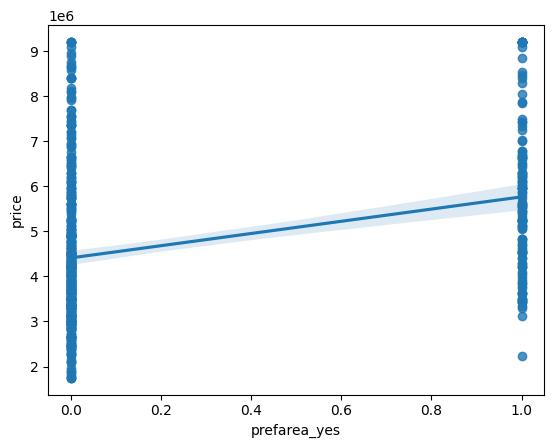

In [191]:
sns.regplot(x="prefarea_yes",y="price",data=housingDF)  

<Axes: xlabel='guestroom_yes', ylabel='price'>

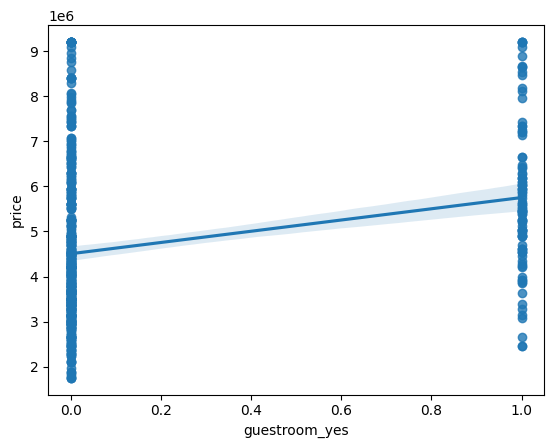

In [192]:
sns.regplot(x="guestroom_yes",y="price",data=housingDF)  

<Axes: xlabel='furnishingstatus_unfurnished', ylabel='price'>

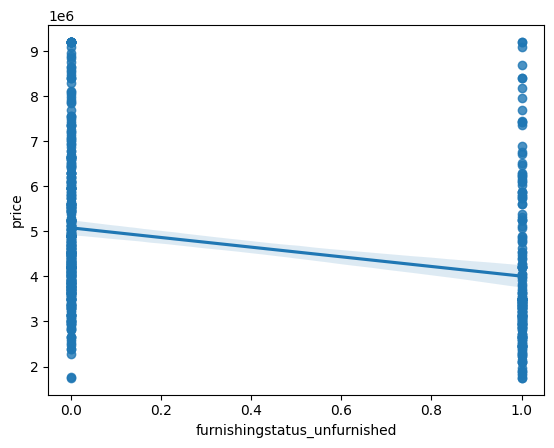

In [193]:
sns.regplot(x="furnishingstatus_unfurnished",y="price",data=housingDF)  

<Axes: xlabel='basement_yes', ylabel='price'>

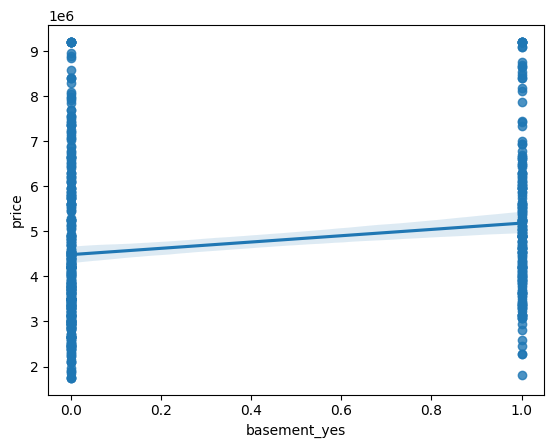

In [194]:
sns.regplot(x="basement_yes",y="price",data=housingDF)  

<Axes: xlabel='hotwaterheating_yes', ylabel='price'>

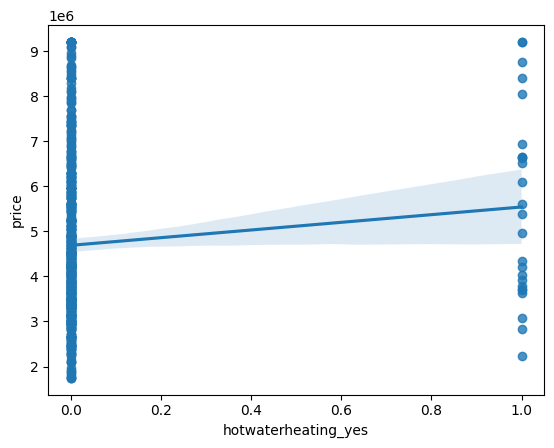

In [195]:
sns.regplot(x="hotwaterheating_yes",y="price",data=housingDF)  

# Step 5: Calculating predicted value

In [196]:
y_predict=reg.predict(x_test)
y_predict               #164 values

array([4082804.60008502, 3938210.69368539, 4983163.73390401,
       5875780.93010601, 4215491.10804558, 4648562.51583524,
       5086149.32234857, 8184548.12814044, 3571214.62040677,
       4831145.23951528, 2894073.27253366, 6221140.45516502,
       7564171.99175184, 6573729.79207218, 4642164.50369001,
       3865590.33369433, 2979314.68272902, 6539732.21425159,
       4698072.4203603 , 6531917.16926105, 3652610.87128809,
       2780553.63263617, 3682426.09734985, 3709711.29230724,
       7279931.08845961, 5206153.48947284, 5079614.83164484,
       7096301.86223525, 2155046.62057726, 3115171.98695233,
       8224343.6050352 , 4086488.15167556, 2488897.57640652,
       5846992.39262858, 6686762.22227503, 4094400.40402886,
       5219435.61122178, 5478209.78896815, 5196433.16911119,
       6924977.78144856, 4872919.50219602, 4817026.43147699,
       4250661.02089954, 3649852.44978034, 4941453.75231876,
       5325726.44184286, 6292763.80816824, 3596000.56664668,
       4462372.90007397,

# Step 6: Evaluating the model

Mean Squared error

In [197]:
mean_squared_error(y_test,y_predict)

1232163379733.2766

Coefficient of Regression

In [198]:
reg.score(x_train,y_train)

0.7372490645756504